In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os


plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
file='./data/sstm_anom_GO.nc'

In [3]:
ds = xr.open_dataset(file)

In [4]:
ds = ds.sel(lat = slice( 0, 80))

In [5]:
basin = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Masks/.basin/dods')
basin = basin.rename({'X': 'lon', 'Y': 'lat'})
basin_surf = basin.basin[0]
basin_surf

<xarray.DataArray 'basin' (lat: 180, lon: 360)>
[64800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    Z        float32 0.0
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    long_name:  basin code
    CLIST:      Atlantic Ocean\nPacific Ocean \nIndian Ocean\nMediterranean S...
    valid_min:  1
    valid_max:  58
    scale_min:  1
    units:      ids
    scale_max:  58

In [9]:
basin_names=basin_surf.attrs['CLIST'].split('\n')
basin_names[0]

'Atlantic Ocean'

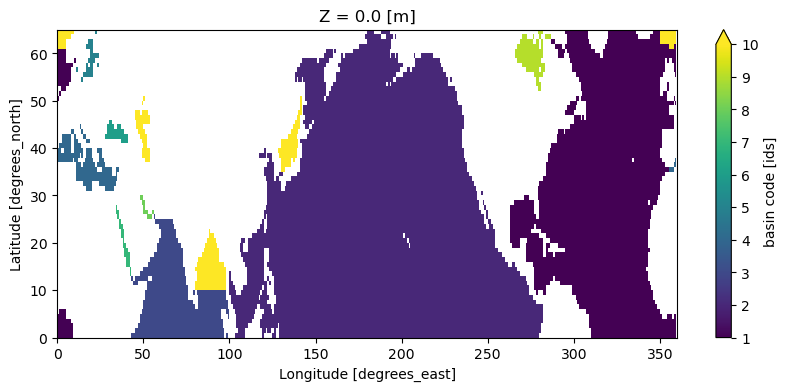

In [10]:
basin_surf_interp = basin_surf.interp_like(ds.sst, method='nearest')
basin_surf_interp.plot(vmax=10)

In [13]:
basin_surf_interp.Z.max()

<xarray.DataArray 'Z' ()>
array(0., dtype=float32)
Coordinates:
    Z        float32 0.0

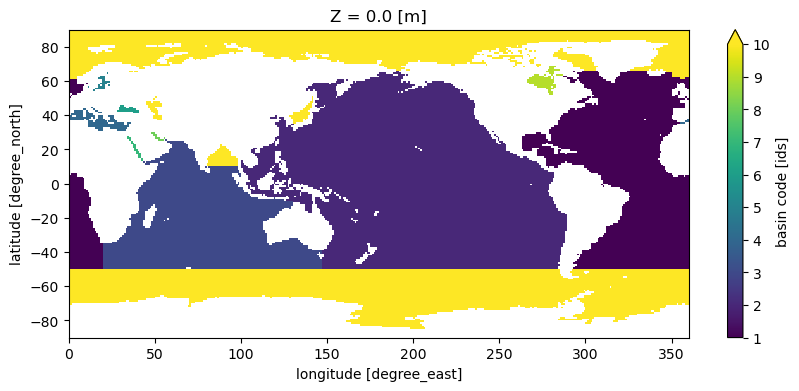

In [7]:
basin_surf.plot(vmax=10)

In [15]:
ds.sst.groupby(basin_surf_interp).first()

<xarray.DataArray 'sst' (time: 498, basin: 13)>
array([[ 9.67025757e-04, -5.45219421e-01,  2.34195709e-01, ...,
         6.45397186e-01,  2.33073330e+00, -1.52114868e-01],
       [-2.44443893e-01, -2.58707047e-01, -6.30683899e-02, ...,
         2.15253830e-02,  1.32734776e+00,  9.61685181e-02],
       [ 1.47209167e-01,  7.94410706e-02,  2.36358643e-02, ...,
         6.90647125e-01,  6.49910927e-01, -1.16449356e-01],
       ...,
       [ 4.12788391e-01, -1.45435333e-02,  6.84179306e-01, ...,
         2.44339561e+00,  1.52057743e+00,  6.60516739e-01],
       [ 1.17527390e+00,  6.70267105e-01,  3.88238907e-01, ...,
         1.58049774e+00,  1.21736145e+00,  2.97332764e-01],
       [ 4.15819168e-01, -9.90676880e-03,  1.01445770e+00, ...,
         1.07869530e+00,  8.23087692e-01,  1.04199600e+00]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2023-06-30
    month    (time) int64 ...
    Z        float32 0.0
  * basin    (basin) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 9.0 11.0 12.0 53.0 56.0

In [16]:
Ylabel  = 'Anomalia de temperatura [($^\circ$C)]'
Xlabel  = 'Fecha'

In [17]:
sst = ds.sst
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_weighted = sst.weighted(weights)

In [18]:
sst

<xarray.DataArray 'sst' (time: 498, lat: 320, lon: 1440)>
array([[[-0.205454, -0.13114 , ..., -0.152756, -0.199118],
        [-0.158909, -0.051729, ..., -0.065014, -0.154514],
        ...,
        [ 0.039501,  0.029795, ..., -0.012727,  0.02654 ],
        [-0.248123, -0.280674, ..., -0.185513, -0.202551]],

       [[-0.162674, -0.234509, ..., -0.026775, -0.095818],
        [-0.024487, -0.050869, ...,  0.030609,  0.011181],
        ...,
        [-0.859945, -0.908322, ..., -0.765082, -0.807078],
        [-0.846609, -0.913227, ..., -0.734634, -0.789119]],

       ...,

       [[ 1.178213,  1.185482, ...,  1.113373,  1.132818],
        [ 1.127716,  1.123579, ...,  1.101875,  1.10918 ],
        ...,
        [-1.910234, -1.969765, ..., -1.74695 , -1.839941],
        [-1.737683, -1.806979, ..., -1.577713, -1.661144]],

       [[ 0.374878,  0.420666, ...,  0.324183,  0.343634],
        [ 0.436182,  0.447638, ...,  0.416973,  0.41258 ],
        ...,
        [-1.389333, -1.436272, ..., -1.295091, -1.346454],
        [-1.178091, -1.220334, ..., -1.11    , -1.141909]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 79.12 79.38 79.62 79.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2023-06-30
    month    (time) int64 ...

In [19]:
GPbasin_mean_sst = ds.groupby(basin_surf_interp)

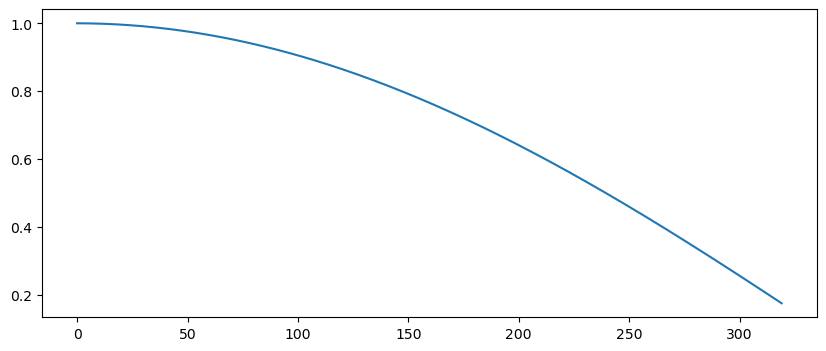

In [20]:
plt.plot(weights)

In [21]:
GPbasin_mean_sst.first()

<xarray.Dataset>
Dimensions:  (basin: 13, time: 498)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2023-06-30
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 8 9 10 11 12 1 2 3 4 5 6
    Z        float32 0.0
  * basin    (basin) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 9.0 11.0 12.0 53.0 56.0
Data variables:
    sst      (basin, time) float32 0.000967 -0.2444 0.1472 ... 0.2973 1.042

In [27]:
basin_mean_sst = sst.groupby(basin_surf_interp).mean()
basin_mean_sst

<xarray.DataArray 'sst' (time: 498, basin: 13)>
array([[ 0.11207746,  0.04222956, -0.08437423, ..., -0.14544202,
         0.79716456, -0.08803698],
       [ 0.05704502,  0.08697981,  0.09179239, ...,  0.00701637,
         0.65872633,  0.05165701],
       [ 0.08125335,  0.08931918, -0.06236547, ...,  0.14052585,
         0.6233164 , -0.13482924],
       ...,
       [ 1.0594108 ,  0.65803313,  0.9142534 , ...,  2.1242301 ,
         1.9704937 ,  0.89732724],
       [ 1.081449  ,  0.63833195,  0.7919686 , ...,  2.0824442 ,
         0.82342565,  0.8129867 ],
       [ 0.87216836,  0.41219014,  1.2668318 , ...,  1.5011681 ,
         0.01684929,  0.9743553 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2023-06-30
    month    (time) int64 ...
    Z        float32 0.0
  * basin    (basin) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 9.0 11.0 12.0 53.0 56.0

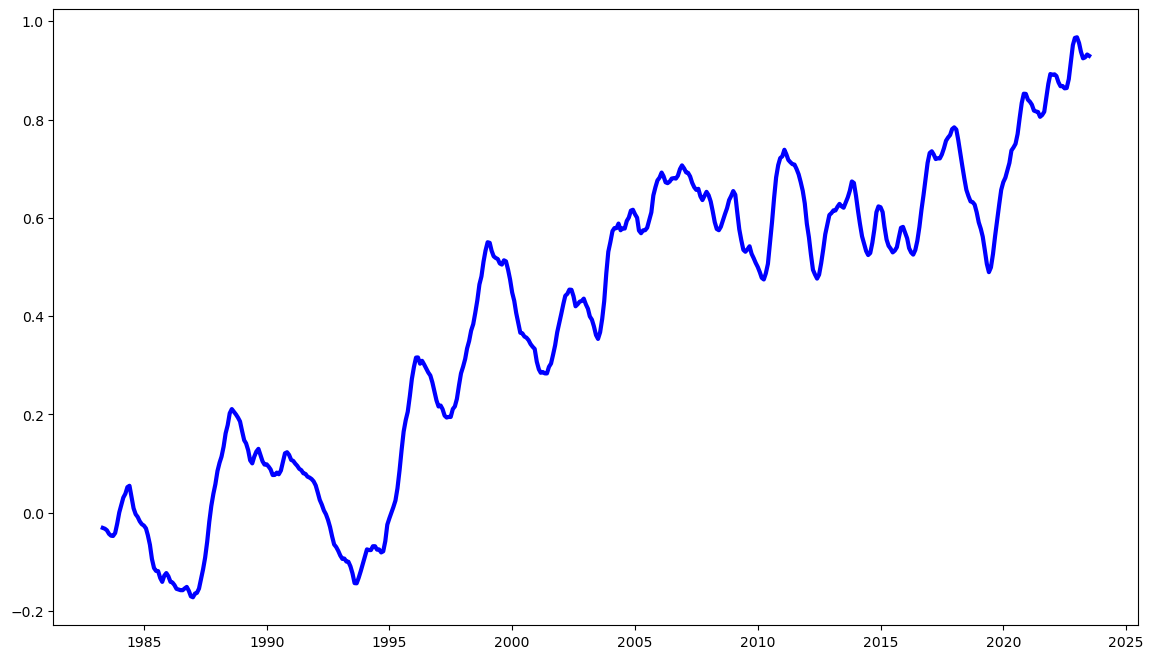

In [29]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(basin_mean_sst.time,basin_mean_sst[:,0].rolling(time = 16).mean(),linewidth=3,color='b')
#ax.plot(basin_Wmean_sst.time,basin_Wmean_sst[:,0].rolling(time = 16).mean(),linewidth=3,color='r')

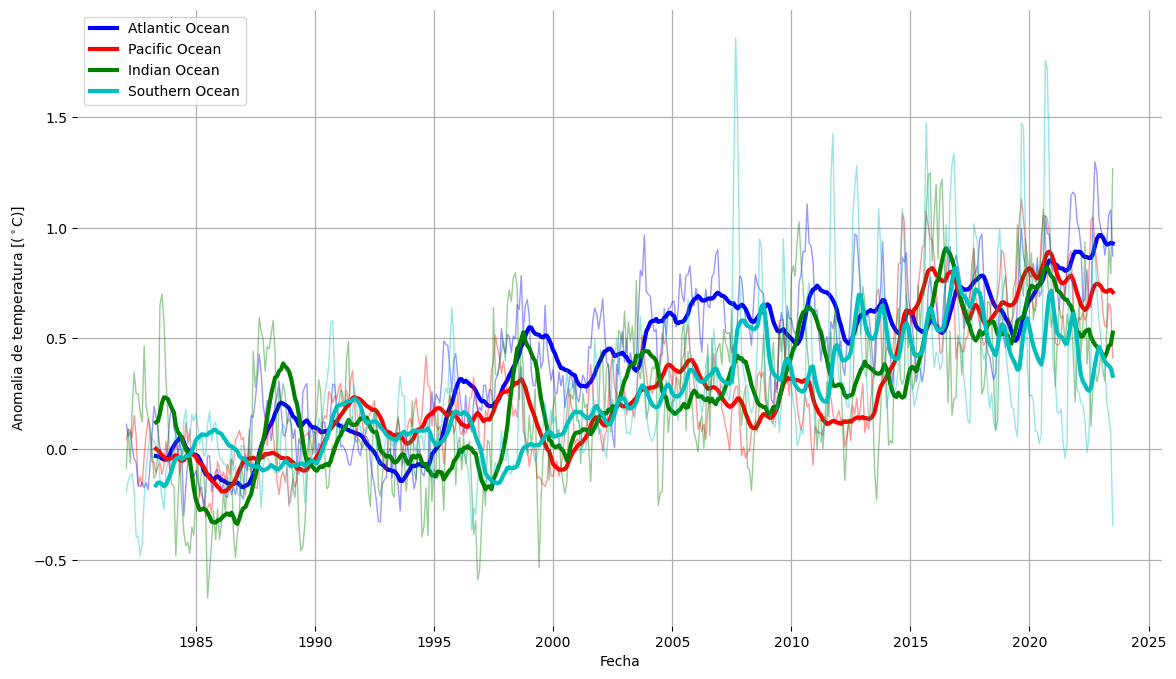

In [28]:
#basin_mean_sst[:,0].rolling(time = 12 ).mean().plot()    
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))

ax.plot(basin_mean_sst.time,basin_mean_sst[:,0].rolling(time = 16).mean(),label=basin_names[0],linewidth=3,color='b')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,0],linewidth=1,color='b',alpha=0.4)

ax.plot(basin_mean_sst.time,basin_mean_sst[:,1].rolling(time = 16).mean(),label=basin_names[1],linewidth=3,color='r')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,1],linewidth=1,color='r',alpha=0.4)

ax.plot(basin_mean_sst.time,basin_mean_sst[:,2].rolling(time = 16).mean(),label=basin_names[2],linewidth=3,color='g')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,2],linewidth=1,color='g',alpha=0.4)

ax.plot(basin_mean_sst.time,basin_mean_sst[:,9].rolling(time = 16).mean(),label=basin_names[9],linewidth=3,color='c')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,9],linewidth=1,color='c',alpha=0.4)

ax.set_ylabel(Ylabel)
ax.set_xlabel(Xlabel)
ax.set_frame_on(False)
ax.grid(linestyle='-', linewidth=.9)
ax.legend()

In [43]:
basin_mean_sst = ds.sst.groupby(basin_surf_interp).mean()

In [44]:
df = basin_mean_sst.mean('time').to_dataframe()

In [45]:
import pandas as pd
basin_names = basin_surf.attrs['CLIST'].split('\n')
basin_df = pd.Series(basin_names, index=np.arange(1, len(basin_names)+1))

<Axes: xlabel='basin_name'>

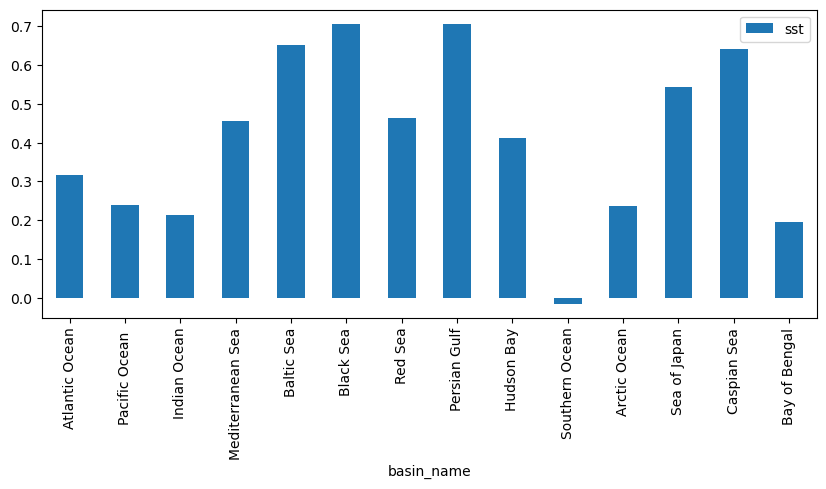

In [46]:
df = df.join(basin_df.rename('basin_name'))
df.plot.bar(y='sst', x='basin_name')